# Gamma Regression Implementation

## Preliminaries

### Imports

In [1]:
import numpy as np
import numpy.random as random

import matplotlib.pyplot as plt

from scipy.special import factorial
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import scipy.optimize as optimize
import scipy.special as special

import pandas as pd

import sys

%matplotlib inline

### Random Seed

In [2]:
seed=567
np.random.seed(seed)

## Gamma Regression

When $Y\in\mathbb{R}^+$, ie $y>0$ is   positive real numbers it is  natural to assume that $Y|_X$ follows a $\Gamma$   distribution. For simplicity we will assume $\alpha$ is a fixed **known** parameter. 

$$
    p(y|x) = \frac{\beta^\alpha}{\Gamma(\alpha)}s^{\alpha-1}e^{-\beta s} = \frac{s^{\alpha-1}}{\Gamma(\alpha)}e^{ -y\beta +  \alpha\log \beta }
$$  
were $\alpha>0$ and $\beta>0$

And a non-canonical log link

$$
    \eta(x) = -e^{-b_0 - W_0 x}
$$



### Generate random sample data

<div class="alert alert-block alert-info"> Problem 0 </div>
Generate some random data to test model

In [3]:
alpha=5.0

The true parameters used to generate the data are
$$
    \theta_0=(b_0,w_0)=(0,1)
$$

In [4]:
b0=0
W0=1

theta0=np.array([b0,W0])
theta0.shape

(2,)

We generate $N=30$ samples, with $X\sim \mathcal{U}(0,4)$.

In [5]:
N=30
X=np.random.uniform(0,4,(N,1))
X.shape

(30, 1)

In [6]:
X1=np.c_[np.ones(len(X)),X]

b=np.exp(np.dot(X1,theta0))
Y=stats.gamma.rvs(a=alpha,scale=b)
Y.shape

(30,)

<div class="alert alert-block alert-info"> Problem 0.1 </div>
Make a scatter plot of `X` vs `Y`

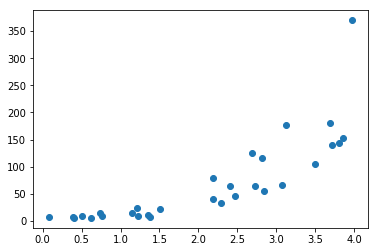

In [7]:
plt.scatter(X,Y)

## Fit linear model

<div class="alert alert-block alert-info"> Problem 1.0 </div>
To demonstrate what goes wrong with a linear least squares model, fit the data to a linear regression.


In [8]:
linear_model=LinearRegression()
linear_model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


<div class="alert alert-block alert-info"> Problem 1.1 </div>
Make a line plot of the linear fit over the the test points `x_test`
superimposed over the $X,Y$ input data.

In [9]:
x_test=np.linspace(0,4,201).reshape(-1,1)

In [10]:
Y_linear_pred=linear_model.predict(x_test)

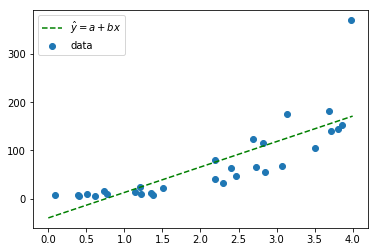

In [11]:
plt.scatter(X,Y,label="data")
plt.plot(x_test,Y_linear_pred,label="$\hat{y}=a+b x$",linestyle="--",color="g")
plt.legend()

## Gamma Regression

There are specialized (re-weighed least square methods) to solve Generalized linear models, but here we just use the standard `scipy.optimize.minimize` routine to fit a Gamma Regression model to the data.

### Link Function

<div class="alert alert-block alert-info"> Problem 2.1 </div>
Using the results you worked out on written homework 5
write the function
$$
    \hat{y}(x_1;\alpha,\theta)
$$
where $\theta=(b,w)$

and $x_1$ is a 2 dimensional vector  with a first column of ones $x_1=(1,x)$

We are assuming
$$
    p(y|x) = \frac{\beta^\alpha}{\Gamma(\alpha)}s^{\alpha-1}e^{-\beta s} = \frac{s^{\alpha-1}}{\Gamma(\alpha)}e^{ -y\beta +  \alpha\log \beta }
$$  
were $\alpha>0$ and $\beta>0$

And a non-canonical log link

$$
    \eta(x) = -e^{-b_0 - W_0 x}
$$


From the above expression, the base measure is
$$
    h(s)=\frac{s^{\alpha-1}}{\Gamma(\alpha)}
$$

the sufficient statistic is
$$
    T(s)=s
$$
where the canonical parameter is
$$
    \eta= -\beta
$$
with the constrain $\eta<0$.

The cumulant function is
$$
    A(\eta) = - \alpha\log (- \eta)
$$

if we assume the log of $\eta$ is linear on the data $X$ (this is a **log link**)
$$
    \eta(x) = -e^{-(b + x^T w)}
$$

where the minus sign is there for convenience, and does not affect the assumptions.

With those assumptions we have a ** Gamma regression model**.

The cross entropy loss (negative log likelihood) is (dropping terms that do not depend on $\eta$)
$$
    E(b,w;\{x_i,y_i\}) = \frac{1}{N}\sum_i \left\{\alpha \left(b +\sum_d x_{i,d}^T w_d\right) + y_i e^{b+\sum_d x_{i,d} w_d }\right\} 
$$
this is a *convex* optimization problem that can be solved using `scipy.optimize`, gradient descent, or any other method of our choosing.

The expected value is given by
$$
    \hat{y}(x;b,w)=\mathbb{E}(y|x) = A'(\eta) = \alpha e^{b+x^T w}
$$
and
$$
    \textrm{Var}(y|x) = \alpha e^{2(b+x^T w)}
$$

In [12]:
def beta(theta,X): 
    eta=-np.exp(-np.dot(X,theta))
    return -eta

In [13]:
def y_hat(X1,alpha,theta):
    return alpha/beta(theta,X1)

In [ ]:
(x1,x2)
(2)

<div class="alert alert-block alert-info"> Problem 2.2 </div>
Using the *true parameters*
$$
    \theta_0=(b_0,w_0)
$$
Superimpose a plot of $\hat{y}(x,\alpha,\theta_0)$ to the plots of the linear fit 
and the problem data $X,Y$


In [14]:
x1_test=np.c_[np.ones(len(x_test)),x_test]

In [15]:
y_true=y_hat(x1_test,alpha,theta0)
y_true

array([  5.        ,   5.1010067 ,   5.20405387,   5.30918273,
         5.41643534,   5.52585459,   5.63748426,   5.75136899,
         5.86755435,   5.98608682,   6.10701379,   6.23038365,
         6.35624575,   6.48465043,   6.61564906,   6.74929404,
         6.88563882,   7.02473795,   7.16664707,   7.31142295,
         7.45912349,   7.60980778,   7.76353609,   7.92036992,
         8.08037201,   8.24360635,   8.41013825,   8.58003431,
         8.7533625 ,   8.93019215,   9.110594  ,   9.29464021,
         9.4824044 ,   9.67396167,   9.86938866,  10.06876354,
        10.27216605,  10.47967757,  10.6913811 ,  10.90736133,
        11.12770464,  11.35249919,  11.58183488,  11.81580347,
        12.05449853,  12.29801556,  12.54645195,  12.79990709,
        13.05848237,  13.32228121,  13.59140914,  13.86597382,
        14.14608507,  14.43185495,  14.72339776,  15.02083012,
        15.32427102,  15.63384183,  15.94966638,  16.27187101,
        16.60058461,  16.93593867,  17.27806732,  17.62

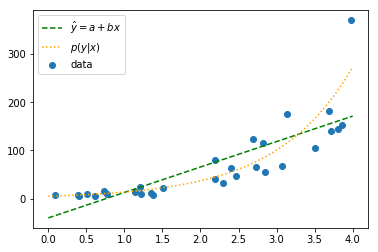

In [16]:
plt.scatter(X,Y,label="data")
plt.plot(x_test,Y_linear_pred,label="$\hat{y}=a+b x$",linestyle="--",color="g")
plt.plot(x_test,y_true,label="$p(y|x)$",linestyle=":",color="orange")
plt.legend()
plt.legend()

### Loss and Loss Gradient

<div class="alert alert-block alert-info"> Problem 3.1 </div>
Write the max likelihood loss for the Gamma Regression problem with log link

$$
E^{\textrm{log}}_{\textrm{Gam}}(\theta;X_1,Y,\alpha)
$$

where $X_1$ is a $2\times N$ matrix and $Y$ is a $N$ vector of input data

In [17]:
def GammaError(theta,X1,Y,alpha):
    pass

In [18]:
def GammaError(theta,X1,Y,alpha):
    eta=-np.exp(-np.dot(X1,theta))
    loss=-alpha*np.log(-eta)-Y*eta
    return loss.mean()

<div class="alert alert-block alert-info"> Problem 3.2 </div>
Write the gradient max likelihood loss for the Gamma Regression problem with log link

$$
\frac{\partial}{\partial \theta_d} E^{\textrm{log}}_{\textrm{Gam}}(\theta;X_1,Y,\alpha)
$$


In [19]:
def GammaErrorGradient(theta,X1,Y,alpha): 
    pass

In [20]:
def GammaErrorGradient(theta,X1,Y,alpha): 
    y_e=y_hat(X1,alpha,theta)
    dpsi=np.exp(-np.dot(X1,theta))
    dloss=(y_e-Y)*dpsi
    grad=np.dot(dloss.T,X1)/len(X1)
    return grad.ravel()

<div class="alert alert-block alert-info"> Problem 3.3 </div>
Use the function `scipy.minimize.check_gra` to verify that the gradient function is 
implemented correctly at the point 
$$
    \theta_{\textrm{test}} = (-1,1.5)
$$


In [21]:
theta_test=np.array([-1,1.5])

In [22]:
X1=np.c_[np.ones(len(X)),X]
optimize.check_grad(GammaError,GammaErrorGradient,theta_test,X1,Y,alpha)

2.7453492675473255e-07

In [23]:
### Optimization

<div class="alert alert-block alert-info"> Problem 4.1 </div>
Fill in the `fit` and `predict` methods in the class below.

Inside the `fit` method:
2. Initilize the initial guess for $\theta$ at random.
1. Use `scipy.optimize` with method `bfgs` to find the optimal parameters.

In [24]:
class GammaRegression:
    def __init__(self,alpha):
        self.alpha=alpha
    def fit(self,X,Y):
        pass
    def predict(self,X):
        pass

In [25]:
class GammaRegression:
    def __init__(self,alpha):
            self.alpha=alpha
    def fit(self,X,Y):
        X1=np.c_[np.ones(len(X)),X]
        N,D=X1.shape
        theta0=np.random.normal(0,1,D)
        fit=optimize.minimize(GammaError,theta0,jac=GammaErrorGradient,args=(X1,Y,self.alpha),method="bfgs")
        #print(fit)
        self.theta=fit.x
        return self
    def predict(self,X):
        X1=np.c_[np.ones(len(X)),X]
        return y_hat(X1,self.alpha,self.theta)

<div class="alert alert-block alert-info"> Problem 4.1 </div>
Fit the model to  the `X`, `Y` data.

What are the fitter parameters?

In [26]:
model=GammaRegression(alpha=alpha)
model.fit(X,Y)
Yg_pred=model.predict(x_test)
model.theta

array([0.00271211, 0.98051382])

The Gamma model fits the data much better

<div class="alert alert-block alert-info"> Problem 4.2 </div>
Superimpose plots of
1. fitted model predictions for `x_test`
2. $\hat{y}(x_test,\alpha,\theta_0)$ for the true model
3. The linear model fit 
4. The problem data $X,Y$


In [27]:
y_pred=model.predict(x_test)

Text(0,0.5,'Y')

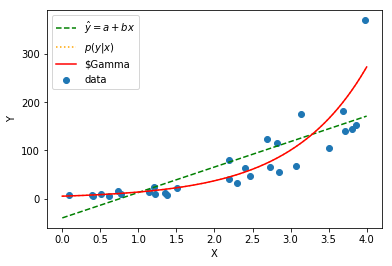

In [28]:
plt.scatter(X,Y,label="data")
plt.plot(x_test,Y_linear_pred,label="$\hat{y}=a+b x$",linestyle="--",color="g")
plt.plot(x_test,y_true,label="$p(y|x)$",linestyle=":",color="orange")
plt.plot(x_test,y_true,label="$Gamma",linestyle="-",color="red")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")

## Dependence on $\alpha$

Keeping $X$ and $Y$ Fixed

<div class="alert alert-block alert-info"> Problem 5.1 </div>
How do the fitted parameters $\hat{b}$ and $\hat{w}$ depend on the parameter $\alpha$ used for fitting?

In [29]:
model=GammaRegression(alpha=alpha)
model.fit(X,Y)
model.theta

array([0.00271272, 0.98051345])

In [30]:
model=GammaRegression(alpha=alpha*np.exp(1))
model.fit(X,Y)
model.theta

array([-0.99728752,  0.98051354])

In [31]:
model=GammaRegression(alpha=alpha*np.exp(2))
model.fit(X,Y)
model.theta

array([-1.99728761,  0.9805136 ])

In [32]:
model=GammaRegression(alpha=alpha*np.exp(-2))
model.fit(X,Y)
model.theta

array([2.00269871, 0.98051943])

$$
\hat{b}= \hat{b}_0 - \log(\frac{\alpha}{\alpha_0})
$$

$w$ does not change

<div class="alert alert-block alert-info"> Problem 5.1 </div>
How do the fitted predicted levels of $Y$ depend the parameter $\alpha$ used for fitting?

In [33]:
model0=GammaRegression(alpha=alpha)
model0.fit(X,Y)
Y0_pred=model0.predict(x_test)

In [34]:
model=GammaRegression(alpha=alpha*np.exp(1))
model.fit(X,Y)
Y_pred=model.predict(x_test)

In [35]:
np.mean((Y_pred-Y0_pred)**2)

1.0245998891848619e-08

The predictions are identical

<div class="alert alert-block alert-info"> Problem 5.2 </div>
Can you explain why this happens based on the expression for $E^{\textrm{log}}_{\textrm{Gam}}$ that
you worked out in the written homework?